In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**IMPORT DATA**

Dataset ini memberikan gambaran lengkap tentang transaksi penjualan online di berbagai kategori produk. Setiap baris mewakili satu transaksi dengan informasi rinci seperti  order ID, date, category, product name, quantity sold, unit price, total price, region, and payment method.

In [4]:
df = pd.read_csv('D:/Kuliah/Semester 4/penambangan data dan analisis bisnis/Data Penjualan.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

**Visualisasi Data**

*Bar Chart*

Text(0, 0.5, 'Revenue')

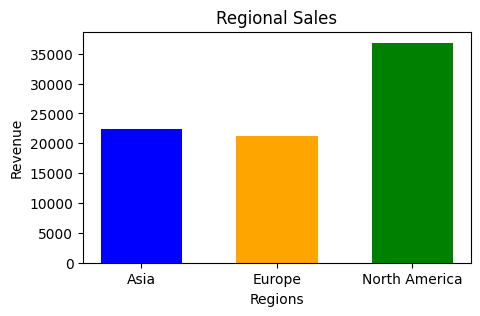

In [32]:
plt.figure(figsize=(5, 3))
regional_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
bar_colours = ['Blue', 'Orange', 'Green']
plt.bar(regional_sales['Region'], regional_sales['Total Revenue'], width = 0.6, color = bar_colours)
plt.title('Regional Sales')
plt.xlabel("Regions")
plt.ylabel("Revenue")


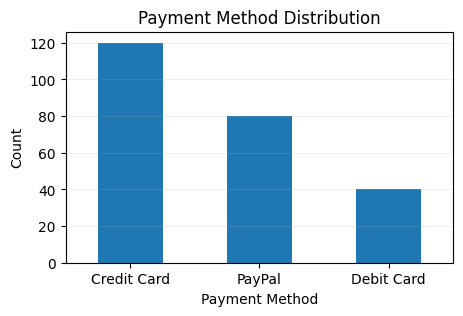

In [31]:
Payment_method = df['Payment Method'].value_counts()
Payment_method.plot(kind='bar',figsize=(5, 3))
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.xticks(rotation=0)
plt.grid(axis = 'y', alpha = 0.2 )
plt.show()

*Line Chart*

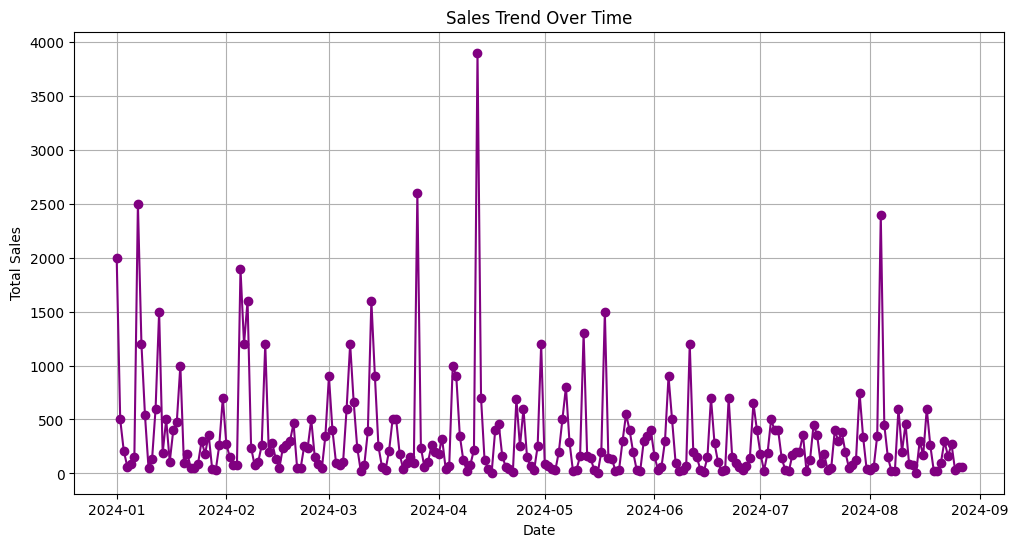

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
sales_trend = df.groupby('Date')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Date'],sales_trend['Total Revenue'],marker='o',color='Purple')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

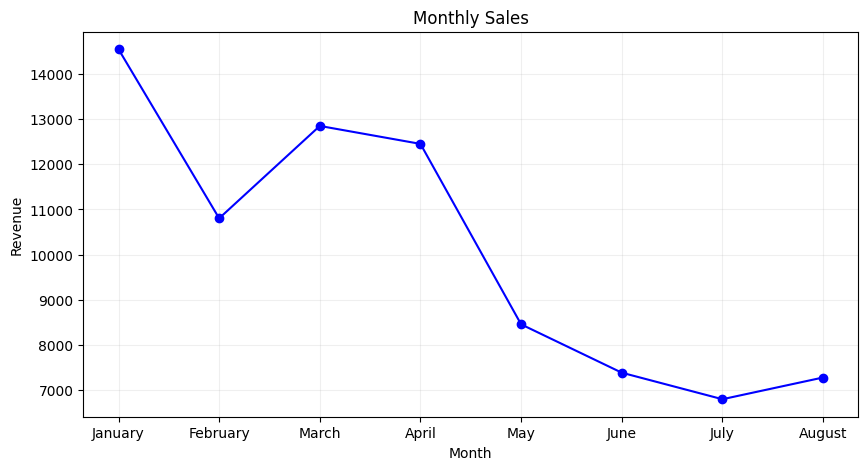

In [23]:
df['Month'] = df['Date'].dt.to_period('M')

Monthly_Sales = df.groupby('Month')["Total Revenue"].sum().reset_index()

Monthly_Sales['Month'] = Monthly_Sales['Month'].dt.strftime('%B')

month = Monthly_Sales['Month']
revenue = Monthly_Sales['Total Revenue']

plt.figure(figsize=(10, 5))
plt.plot(month, revenue, linestyle='-', color='blue', marker='o')
plt.grid(alpha=0.2)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

*Pie Chart*

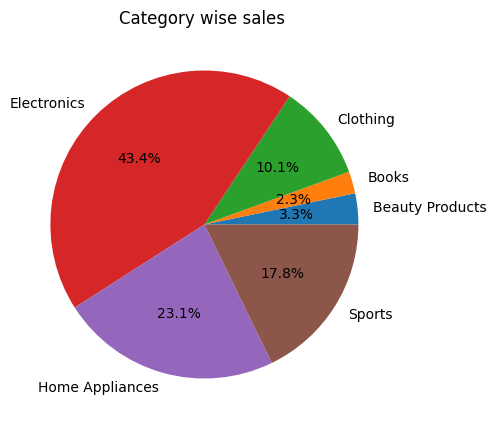

In [25]:
Category_Sale = df.groupby("Product Category")["Total Revenue"].sum()
plt.figure(figsize=(10, 5))
plt.pie(Category_Sale, labels = Category_Sale.index, autopct='%1.1f%%')
plt.title("Category wise sales ")
plt.show()